In [ ]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ODI_Match_info.csv')
df

,season,date,team1,team2,toss_winner,toss_decision,winner,venue
0,2023/24,9/24/2023,India,Australia,Australia,field,India,"Holkar Cricket Stadium, Indore"
1,2023,9/23/2023,England,Ireland,Ireland,field,England,"Trent Bridge, Nottingham"
2,2023,9/23/2023,New Zealand,Bangladesh,New Zealand,bat,New Zealand,"Shere Bangla National Stadium, Mirpur"
3,2023/24,9/22/2023,Australia,India,India,field,India,"Punjab Cricket Association IS Bindra Stadium, ..."
4,2023,9/21/2023,New Zealand,Bangladesh,Bangladesh,field,NaN,"Shere Bangla National Stadium, Mirpur"
...,...,...,...,...,...,...,...,...
2374,2002/03,1/9/2003,Sri Lanka,Australia,Australia,field,Sri Lanka,Sydney Cricket Ground
2375,2002/03,1/8/2003,New Zealand,India,New Zealand,bat,India,"Westpac Stadium, Wellington"
2376,2002/03,1/4/2003,India,New Zealand,New Zealand,field,New Zealand,"Davies Park, Queenstown"
2377,2002/03,1/1/2003,India,New Zealand,India,bat,New Zealand,"Jade Stadium, Christchurch"


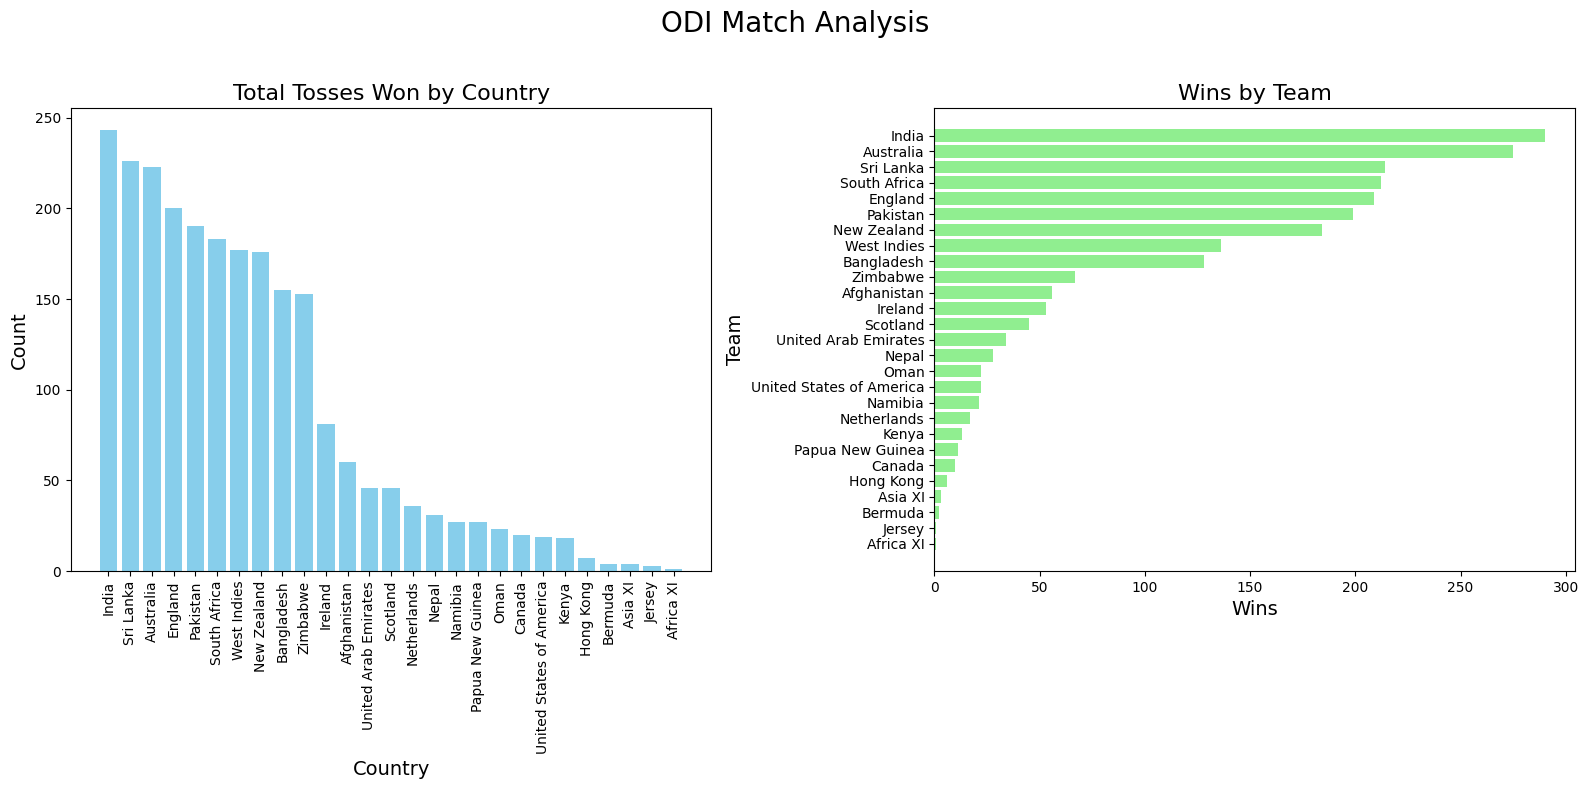

In [ ]:
# value_counts() Count the number of tosses won by each team
toss_wins = df['toss_winner'].value_counts()

# Count the number of matches won by each team
#match_wins = df['winner'].value_counts()
match_wins = df['winner'].value_counts().sort_values(ascending=True)

# Create the bar charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('ODI Match Analysis', fontsize=20)

# Bar chart for toss wins (vertical bar chart)
axs[0].bar(toss_wins.index, toss_wins.values, color='skyblue')
axs[0].set_title('Total Tosses Won by Country', fontsize=16)
axs[0].set_xlabel('Country', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].tick_params(axis='x', rotation=90)

# Bar chart for match wins (horizontal bar chart)
axs[1].barh(match_wins.index, match_wins.values, color='lightgreen')
axs[1].set_title('Wins by Team', fontsize=16)
axs[1].set_xlabel('Wins', fontsize=14)
axs[1].set_ylabel('Team', fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-4-fa723458a4dc>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(match_wins))  # 'tab20' provides a wide range of distinct colors


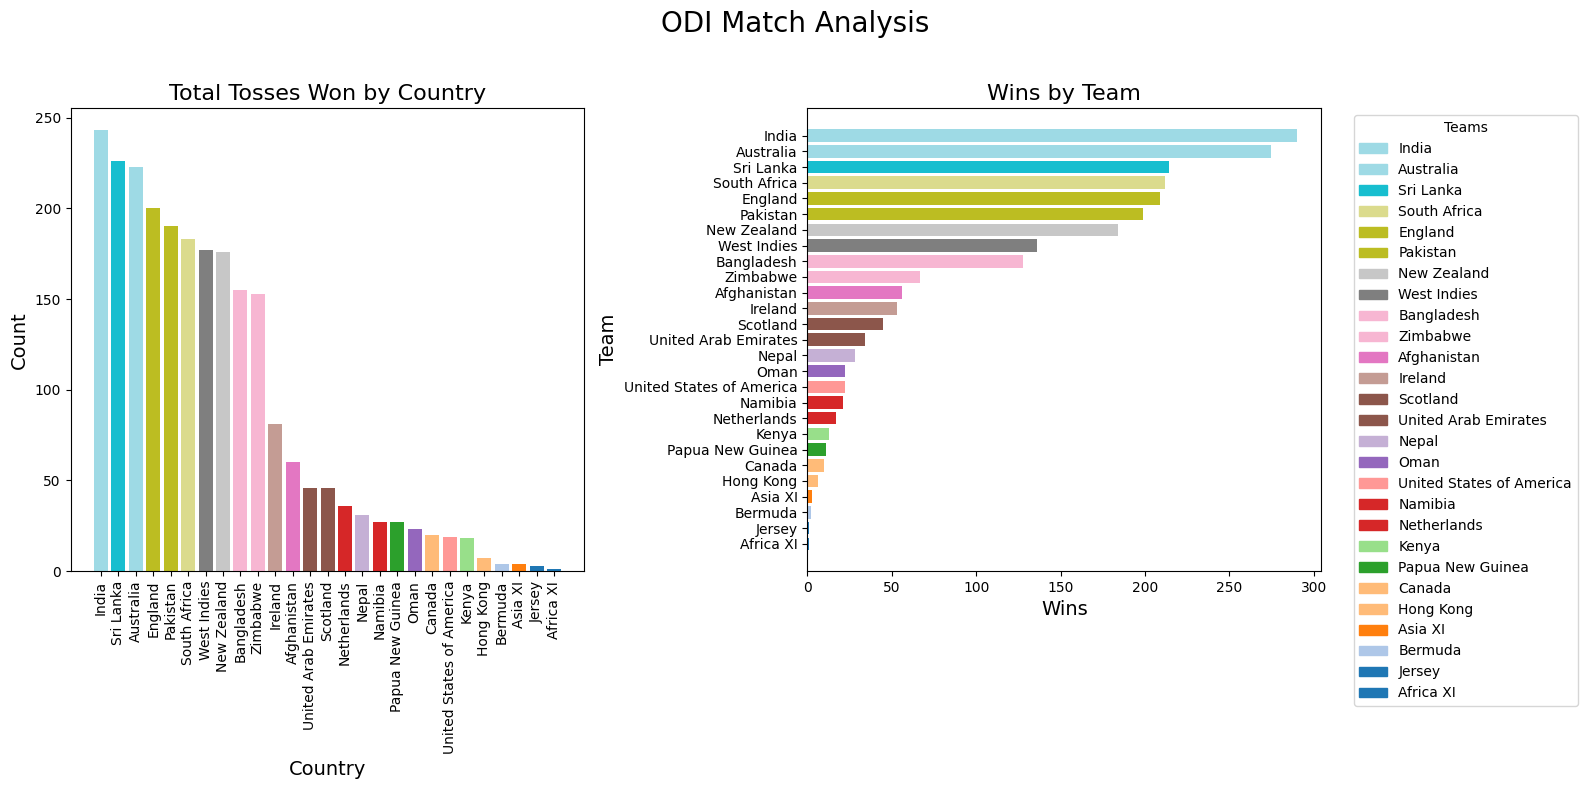

In [ ]:
import matplotlib.pyplot as plt

# Count the number of matches won by each team
match_wins = df['winner'].value_counts().sort_values(ascending=True)

# use color map for the countries (individual colors) tab10, tab20, tab20b, tab20c
colors = plt.cm.get_cmap('tab20', len(match_wins))  # 'tab20' provides a wide range of distinct colors

# Create a dictionary to assign each country a different color
color_dict = {
    team: colors(i) for i, team in enumerate(match_wins.index)
    }

# Create the bar charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('ODI Match Analysis', fontsize=20)

# Bar chart for toss wins (vertical bar chart) row wise
axs[0].bar(toss_wins.index, toss_wins.values, color=[color_dict[team] for team in toss_wins.index])
# title
axs[0].set_title('Total Tosses Won by Country', fontsize=16)
axs[0].set_xlabel('Country', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].tick_params(axis='x', rotation=90)

# Bar chart for match wins (horizontal bar chart)
axs[1].barh(match_wins.index, match_wins.values, color=[color_dict[team] for team in match_wins.index])
# title
axs[1].set_title('Wins by Team', fontsize=16)
axs[1].set_xlabel('Wins', fontsize=14)
axs[1].set_ylabel('Team', fontsize=14)

# Sort teams based on the number of match wins in descending order
sorted_teams = match_wins.sort_values(ascending=False).index

# Add a legend to the plot
#handles = [plt.Rectangle((0,0),1,1, color=color_dict[team]) for team in match_wins.index]
#axs[1].legend(handles, match_wins.index, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[team]) for team in sorted_teams]
axs[1].legend(handles, sorted_teams, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust the layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


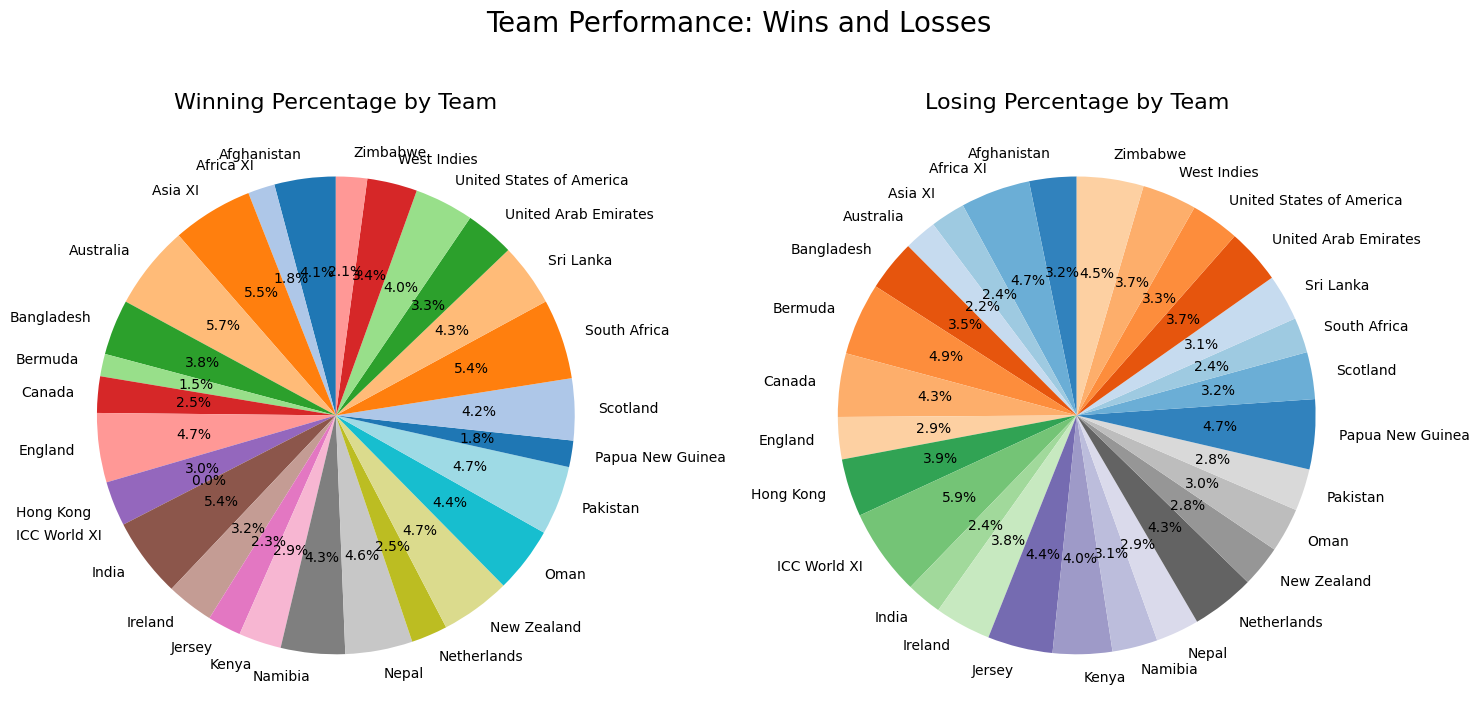

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Count the total matches played by each team
total_matches_team1 = df['team1'].value_counts()
total_matches_team2 = df['team2'].value_counts()
total_matches = total_matches_team1.add(total_matches_team2, fill_value=0)

# Step 2: Count the number of matches won by each team
match_wins = df['winner'].value_counts()

# Step 3: Calculate the percentage of wins and losses for each team
winning_percentage = (match_wins / total_matches) * 100
losing_percentage = 100 - winning_percentage

# Fill NaN values for teams with no wins (i.e., teams that only lost)
winning_percentage = winning_percentage.fillna(0)
losing_percentage = losing_percentage.fillna(100)

# Step 4: Prepare the labels and sizes for the pie charts
teams = total_matches.index
win_sizes = winning_percentage.values
loss_sizes = losing_percentage.values

# Step 5: Create subplots for wins and losses pie charts
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Winning percentage pie chart
axs[0].pie(win_sizes, labels=teams, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axs[0].set_title('Winning Percentage by Team', fontsize=16)

# Losing percentage pie chart
axs[1].pie(loss_sizes, labels=teams, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c.colors)
axs[1].set_title('Losing Percentage by Team', fontsize=16)

# Set overall title
plt.suptitle('Team Performance: Wins and Losses', fontsize=20)

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


<ipython-input-26-a0d6781f5eae>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
<ipython-input-26-a0d6781f5eae>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


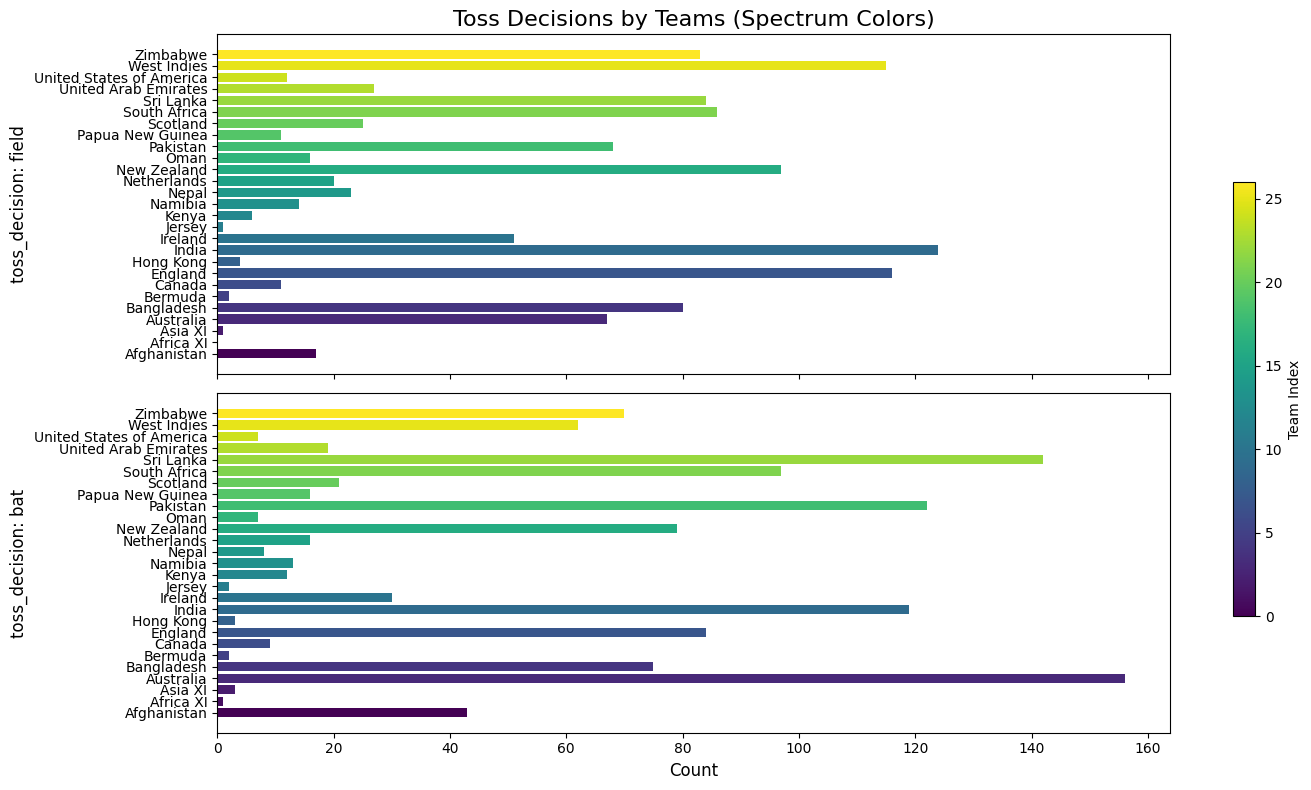

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Group data by 'toss_winner' and 'toss_decision' to get counts
toss_decisions = df.groupby(['toss_winner', 'toss_decision']).size().unstack().fillna(0)

# Teams list
teams = toss_decisions.index

# Separate toss decisions
field_counts = toss_decisions['field']
bat_counts = toss_decisions['bat']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Define a continuous colormap (e.g., 'viridis', 'plasma', 'coolwarm' for spectrum effect)
cmap = plt.cm.get_cmap('viridis')

# Normalize the data to map it to the colormap
norm = plt.Normalize(vmin=0, vmax=len(teams)-1)

# Generate the spectrum-like color map by creating gradient colors for each team based on their index
colors = [cmap(norm(i)) for i in range(len(teams))]

# Horizontal Stacked Bar for 'Field' decisions
axs[0].barh(teams, field_counts, color=colors)
axs[0].set_title('Toss Decisions by Teams (Spectrum Colors)', fontsize=16)
axs[0].set_ylabel('toss_decision: field', fontsize=12)

# Horizontal Stacked Bar for 'Bat' decisions
axs[1].barh(teams, bat_counts, color=colors)
axs[1].set_xlabel('Count', fontsize=12)
axs[1].set_ylabel('toss_decision: bat', fontsize=12)

# Add a colorbar to represent the spectrum
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04, label='Team Index')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
